# **Data Understanding**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
import string, nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/FYP/fake reviews dataset.csv')
data

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [ ]:
n_reviews, n_attributes = data.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  40432
Total Attributes:  4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
data.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data['label'].value_counts().to_frame()

,label
CG,20216
OR,20216


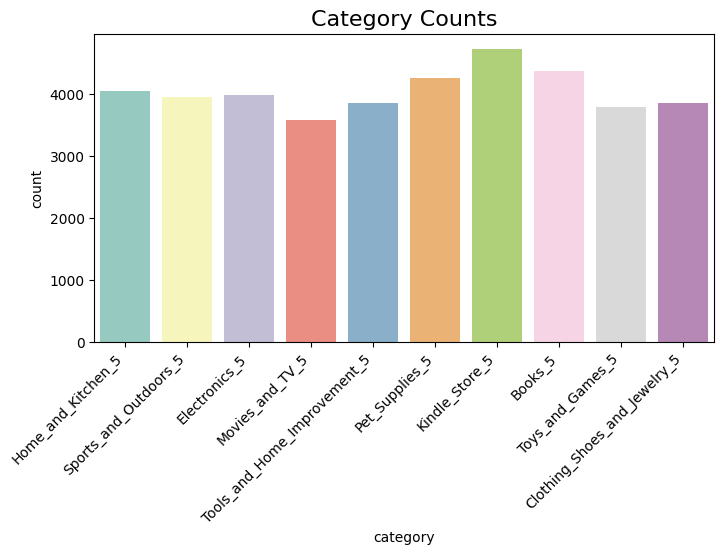

,category
Kindle_Store_5,4730
Books_5,4370
Pet_Supplies_5,4254
Home_and_Kitchen_5,4056
Electronics_5,3988
Sports_and_Outdoors_5,3946
Tools_and_Home_Improvement_5,3858
Clothing_Shoes_and_Jewelry_5,3848
Toys_and_Games_5,3794
Movies_and_TV_5,3588


In [ ]:
plt.figure(figsize=(8, 4))
cc = sns.countplot(x='category', data=data, palette="Set3")
cc.set_xticklabels(cc.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Category Counts', fontsize=16)
plt.show()
data['category'].value_counts().to_frame()

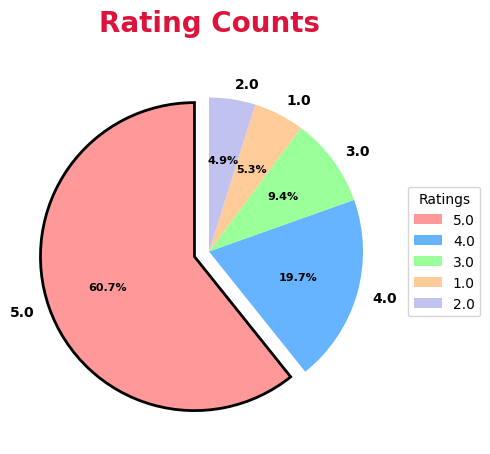

,rating
5.0,24559
4.0,7965
3.0,3786
1.0,2155
2.0,1967


In [ ]:
labels = data['rating'].value_counts().keys()
values = data['rating'].value_counts().values
explode = (0.1, 0, 0, 0, 0)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
fig, ax = plt.subplots(figsize=(7, 5))
wedges, texts, autotexts = ax.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90)
ax.legend(wedges, labels, title="Ratings", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_facecolor('#f5f5f5')
plt.title('Rating Counts', fontweight='bold', fontsize=20, pad=20, color='crimson')
max_index = values.argmax()
wedges[max_index].set(edgecolor='black', linewidth=2)
for autotext in autotexts:
  autotext.set(size=8, fontweight='bold')
for text in texts:
  text.set(size=10, fontweight='bold')
plt.show()

data['rating'].value_counts().to_frame()

In [ ]:
#calculate the number of missing (null or NaN)
data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [ ]:
#display the number of duplicate
dup = data.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  12


# **Data Pre-processing**

## **Data Cleaning**

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
data['text_'][0], clean_text(data['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [ ]:
data['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [ ]:
data.shape

(40432, 4)

In [ ]:
data['text_'] = data['text_'].apply(clean_text)

In [ ]:
data['text_'] = data['text_'].astype(str)

## **Tokenization**

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [ ]:
preprocess(data['text_'][4])

'nice set Good quality set two months'

In [ ]:
data['text_'][:10000] = data['text_'][:10000].apply(preprocess)

In [ ]:
data['text_'][10001:20000] = data['text_'][10001:20000].apply(preprocess)

In [ ]:
data['text_'][20001:30000] = data['text_'][20001:30000].apply(preprocess)

In [ ]:
data['text_'][30001:40000] = data['text_'][30001:40000].apply(preprocess)

In [ ]:
data['text_'][40001:40432] = data['text_'][40001:40432].apply(preprocess)

In [ ]:
data['text_'] = data['text_'].str.lower()

## **Text Normalization**

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
data['text_'] = data['text_'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
data["text_"] = data["text_"].apply(lambda text: lemmatize_words(text))

In [ ]:
data['text_'].head()

0    love well made sturdi comfort love itveri pretti
1        love great upgrad origin ive mine coupl year
2              pillow save back love look feel pillow
3                 miss inform use great product price
4                 nice set good qualiti set two month
Name: text_, dtype: object

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40399 entries, 0 to 40398
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40399 non-null  object 
 1   rating    40399 non-null  float64
 2   label     40399 non-null  object 
 3   text_     40399 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
dup = data.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


In [ ]:
data.to_csv('drive/MyDrive/FYP/fake reviews dataset (after).csv')

In [ ]:
data = pd.read_csv('drive/MyDrive/FYP/fake reviews dataset (after).csv')
data

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month
...,...,...,...,...,...
40394,40394,Clothing_Shoes_and_Jewelry_5,4.0,OR,read review say bra ran small order two band c...
40395,40395,Clothing_Shoes_and_Jewelry_5,5.0,CG,wasnt sure exactli would littl larg small size...
40396,40396,Clothing_Shoes_and_Jewelry_5,2.0,OR,wear hood wear hood wear jacket without hood 3...
40397,40397,Clothing_Shoes_and_Jewelry_5,1.0,CG,like noth dress reason gave star order size fi...


In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


In [ ]:
data.dropna(inplace=True)

# **Modelling and Evaluation**

In [ ]:
data['length'] = data['text_'].apply(len)
data.head()

,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti,48
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year,44
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow,38
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price,35
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month,35


In [ ]:
data.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20183.0  4.258733  1.141615  1.0  4.0  5.0  5.0  5.0  20183.0   
OR     20215.0  4.253228  1.147668  1.0  4.0  5.0  5.0  5.0  20215.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     154.218699  155.254443  4.0  51.0   88.0  192.0  1191.0  
OR     219.053920  233.262491  8.0  68.0  123.0  272.0  1868.0

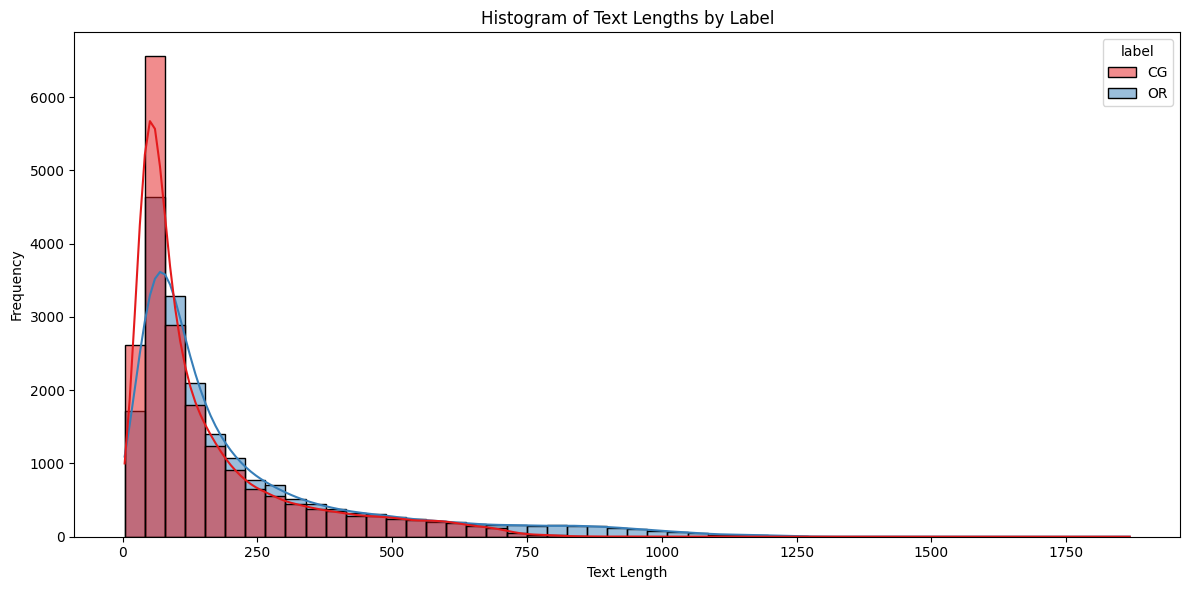

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=data, x='length', bins=50, hue='label', kde=True, palette='Set1')
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Histogram of Text Lengths by Label")
plt.tight_layout()
plt.show()

**BoW**

In [ ]:
def textP(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

bow_transformer = CountVectorizer(analyzer=textP)
bow_transformer

CountVectorizer(analyzer=<function textP at 0x7bab3241d990>)

In [ ]:
bow_transformer.fit(data['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 36373


In [ ]:
test_review1 = data['text_'][0]
test_review1
bow_review1 = bow_transformer.transform([test_review1])
print(bow_review1)
print(bow_review1.shape)

  (0, 7165)	1
  (0, 17001)	1
  (0, 19182)	2
  (0, 19476)	1
  (0, 24986)	1
  (0, 30748)	1
  (0, 35024)	1
(1, 36373)


In [ ]:
bow_reviews = bow_transformer.transform(data['text_'])
print("Shape of BoW:",bow_reviews.shape)
print("Amount of non zero values:",bow_reviews.nnz)
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Shape of BoW: (40398, 36373)
Amount of non zero values: 1006820
Sparsity: 0.07


A higher sparsity percentage indicates that a larger portion of the matrix is empty

**TFIDF**

In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_review1 = tfidf_transformer.transform(bow_review1)
print(tfidf_review1)

  (0, 35024)	0.23430846502162722
  (0, 30748)	0.373116160190393
  (0, 24986)	0.34552894760981573
  (0, 19476)	0.3077873437754186
  (0, 19182)	0.38998467397966324
  (0, 17001)	0.575391955602508
  (0, 7165)	0.32954001743067307


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape of TFIDF:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape of TFIDF: (40398, 36373)
No. of Dimensions: 2


## **Naive Bayes**

Split the data into train and test sets:

In [ ]:
review_train, review_test, label_train, label_test = train_test_split(data['text_'],data['label'],test_size=0.35)

Create and train the pipeline:

In [ ]:
pipeline1 = Pipeline([
    ('bow',CountVectorizer(analyzer=textP)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])
pipeline1.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textP at 0x7d7f55e56200>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Make predictions:

In [ ]:
predictions1 = pipeline1.predict(review_test)
predictions_df = pd.DataFrame({'Actual Labels': label_test, 'Predicted Labels': predictions1})
predictions_df.head()

,Actual Labels,Predicted Labels
32080,OR,OR
29992,CG,CG
2367,CG,CG
35058,OR,OR
19913,OR,OR


Hyperparameter Tuning:

In [ ]:
param_grid1 = {
    'classifier__alpha': [0.1, 1.0, 2.0]
}

tuned_pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=textP)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

GridSearchCV to search for the best value of alpha

In [ ]:
grid_search1 = GridSearchCV(estimator=tuned_pipeline1, param_grid=param_grid1, cv=3, scoring='accuracy')
grid_search1.fit(review_train, label_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function textP at 0x7d7f55e56200>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.1, 1.0, 2.0]},
             scoring='accuracy')

In [ ]:
best_params1 = grid_search1.best_params_
print("Best Hyperparameters:", best_params1)

Best Hyperparameters: {'classifier__alpha': 0.1}


In [ ]:
best_model1 = grid_search1.best_estimator_
tuned_predictions1 = best_model1.predict(review_test)

Result:

-------------- Model Evaluation Results (Naive Bayes) --------------

              precision    recall  f1-score   support

          CG       0.83      0.88      0.86      7064
          OR       0.88      0.82      0.85      7076

    accuracy                           0.85     14140
   macro avg       0.85      0.85      0.85     14140
weighted avg       0.85      0.85      0.85     14140

Accuracy Score: 85.22%



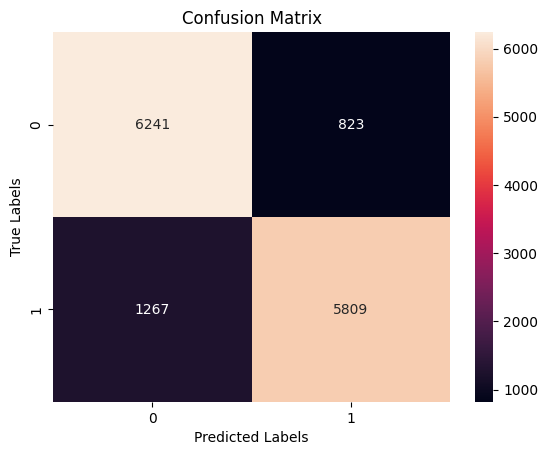

In [ ]:
class_report = classification_report(label_test, predictions1)
conf_matrix = confusion_matrix(label_test, predictions1)

accuracy = accuracy_score(label_test, predictions1)

print("-------------- Model Evaluation Results (Naive Bayes) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

-------------- Tuned Model Evaluation Results (Naive Bayes) --------------

              precision    recall  f1-score   support

          CG       0.85      0.87      0.86      7064
          OR       0.86      0.84      0.85      7076

    accuracy                           0.85     14140
   macro avg       0.85      0.85      0.85     14140
weighted avg       0.85      0.85      0.85     14140

Accuracy Score: 85.46%



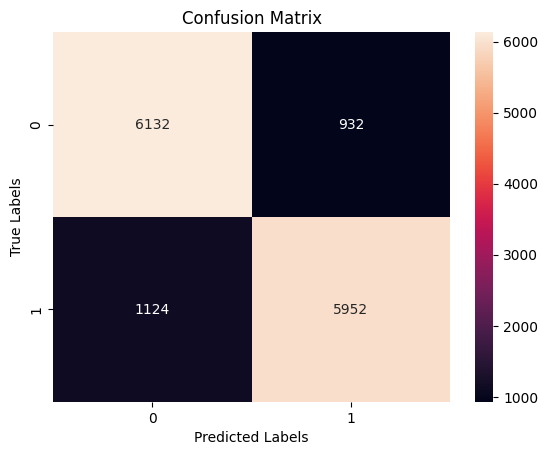

In [ ]:
class_report = classification_report(label_test, tuned_predictions1)
conf_matrix = confusion_matrix(label_test, tuned_predictions1)

accuracy = accuracy_score(label_test, tuned_predictions1)

print("-------------- Tuned Model Evaluation Results (Naive Bayes) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Save the best model to pickle:

In [ ]:
print('Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions1)*100,2)) + '%')
print('Tuned Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,tuned_predictions1)*100,2)) + '%')

Naive Bayes Prediction Accuracy: 85.22%
Tuned Naive Bayes Prediction Accuracy: 85.46%


In [ ]:
with open('drive/MyDrive/FYP/model1_NaiveBayes.pkl', 'wb') as model_file:
    pickle.dump(best_model1, model_file)

## **Random Forest**

Create and train the pipeline:

In [ ]:
pipeline2 = Pipeline([
    ('bow',CountVectorizer(analyzer=textP)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])
pipeline2.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textP at 0x7d7f55e56200>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

Make predictions:

In [ ]:
predictions2 = pipeline2.predict(review_test)
predictions_df = pd.DataFrame({'Actual Labels': label_test, 'Predicted Labels': predictions2})
predictions_df

,Actual Labels,Predicted Labels
32080,OR,OR
29992,CG,CG
2367,CG,CG
35058,OR,OR
19913,OR,OR
...,...,...
16720,CG,CG
22123,OR,OR
360,OR,CG
13390,CG,OR


Hyperparameter Tuning:

In [ ]:
param_grid2 = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30]
}

In [ ]:
tuned_pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=textP)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [ ]:
grid_search2 = GridSearchCV(estimator=tuned_pipeline2, param_grid=param_grid2, cv=3, scoring='accuracy')
grid_search2.fit(review_train, label_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function textP at 0x7d7f55e56200>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_params2 = grid_search2.best_params_
print("Best Hyperparameters:", best_params2)

Best Hyperparameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}


In [ ]:
best_model2 = grid_search2.best_estimator_
tuned_predictions2 = best_model2.predict(review_test)

Result:

-------------- Model Evaluation Results (Random Forest) --------------

              precision    recall  f1-score   support

          CG       0.82      0.89      0.85      7064
          OR       0.88      0.80      0.84      7076

    accuracy                           0.84     14140
   macro avg       0.85      0.84      0.84     14140
weighted avg       0.85      0.84      0.84     14140

Accuracy Score: 84.47%



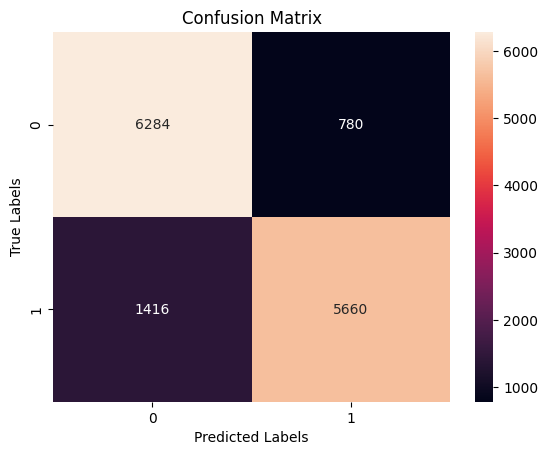

In [ ]:
class_report = classification_report(label_test, predictions2)
conf_matrix = confusion_matrix(label_test, predictions2)

accuracy = accuracy_score(label_test, predictions2)

print("-------------- Model Evaluation Results (Random Forest) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

-------------- Tuned Model Evaluation Results (Random Forest) --------------

              precision    recall  f1-score   support

          CG       0.82      0.89      0.85      7064
          OR       0.88      0.81      0.84      7076

    accuracy                           0.85     14140
   macro avg       0.85      0.85      0.85     14140
weighted avg       0.85      0.85      0.85     14140

Accuracy Score: 84.88%



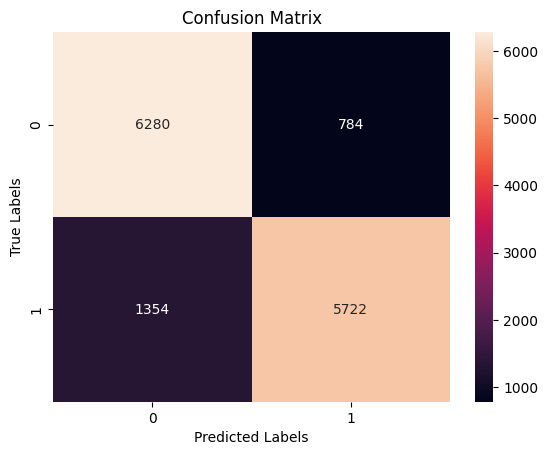

In [ ]:
class_report = classification_report(label_test, tuned_predictions2)
conf_matrix = confusion_matrix(label_test, tuned_predictions2)

accuracy = accuracy_score(label_test, tuned_predictions2)

print("-------------- Tuned Model Evaluation Results (Random Forest) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Save the best model to pickle:

In [ ]:
print('Random Forest Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions2)*100,2)) + '%')
print('Tuned Random Forest Prediction Accuracy:',str(np.round(accuracy_score(label_test,tuned_predictions2)*100,2)) + '%')

Random Forest Prediction Accuracy: 84.47%
Tuned Random Forest Prediction Accuracy: 84.88%


In [ ]:
with open('drive/MyDrive/FYP/model2_RandomForest.pkl', 'wb') as model_file:
    pickle.dump(best_model2, model_file)

## **Decision Tree**

Create and train the pipeline:

In [ ]:
pipeline3 = Pipeline([
    ('bow',CountVectorizer(analyzer=textP)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])
pipeline3.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textP at 0x7bab3241d990>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

Make predictions:

In [ ]:
predictions3 = pipeline3.predict(review_test)
predictions_df = pd.DataFrame({'Actual Labels': label_test, 'Predicted Labels': predictions3})
predictions_df

,Actual Labels,Predicted Labels
39134,CG,CG
31011,OR,OR
24324,OR,OR
9254,OR,OR
38473,CG,CG
...,...,...
25222,CG,OR
11987,CG,CG
11986,OR,CG
3554,CG,CG


Hyperparameter Tuning:

In [ ]:
param_grid3 = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}


In [ ]:
tuned_pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=textP)),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())
])

In [ ]:
grid_search3 = GridSearchCV(estimator=tuned_pipeline3, param_grid=param_grid3, cv=3, scoring='accuracy')
grid_search3.fit(review_train, label_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function textP at 0x7bab3241d990>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5]},
             scoring='accuracy')

In [ ]:
best_params3 = grid_search3.best_params_
print("Best Hyperparameters:", best_params3)

Best Hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


In [ ]:
best_model3 = grid_search3.best_estimator_
tuned_predictions3 = best_model3.predict(review_test)

Result:

-------------- Model Evaluation Results (Decision Tree) --------------

              precision    recall  f1-score   support

          CG       0.73      0.76      0.74      7046
          OR       0.75      0.72      0.73      7094

    accuracy                           0.74     14140
   macro avg       0.74      0.74      0.74     14140
weighted avg       0.74      0.74      0.74     14140

Accuracy Score: 73.74%



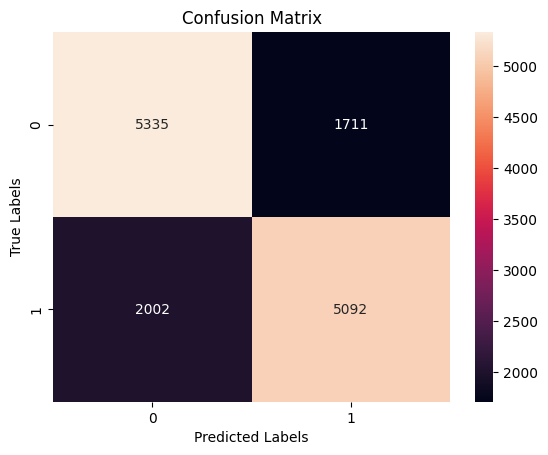

In [ ]:
class_report = classification_report(label_test, predictions3)
conf_matrix = confusion_matrix(label_test, predictions3)

accuracy = accuracy_score(label_test, predictions3)

print("-------------- Model Evaluation Results (Decision Tree) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

-------------- Tuned Model Evaluation Results (Decision Tree) --------------

              precision    recall  f1-score   support

          CG       0.74      0.75      0.74      7046
          OR       0.74      0.74      0.74      7094

    accuracy                           0.74     14140
   macro avg       0.74      0.74      0.74     14140
weighted avg       0.74      0.74      0.74     14140

Accuracy Score: 74.14%



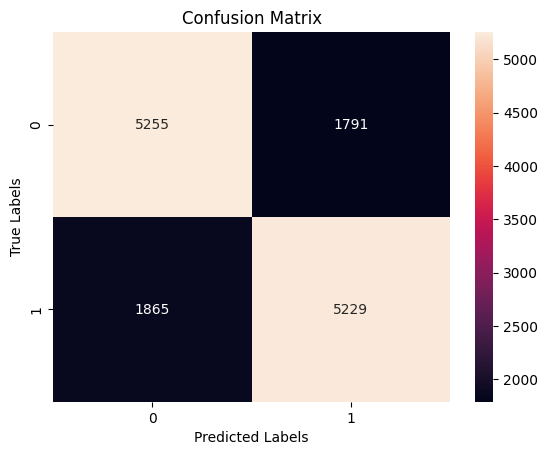

In [ ]:
class_report = classification_report(label_test, tuned_predictions3)
conf_matrix = confusion_matrix(label_test, tuned_predictions3)

accuracy = accuracy_score(label_test, tuned_predictions3)

print("-------------- Tuned Model Evaluation Results (Decision Tree) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Save the best model to pickle:

In [ ]:
print('Decision Tree Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions3)*100,2)) + '%')
print('Tuned Decision Tree Prediction Accuracy:',str(np.round(accuracy_score(label_test,tuned_predictions3)*100,2)) + '%')

Decision Tree Prediction Accuracy: 73.74%
Tuned Decision Tree Prediction Accuracy: 74.14%


In [ ]:
with open('drive/MyDrive/FYP/model3_DecisionTree.pkl', 'wb') as model_file:
    pickle.dump(best_model3, model_file)

## **SVM**

Create and train the pipeline:

In [ ]:
pipeline4 = Pipeline([
    ('bow',CountVectorizer(analyzer=textP)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])
pipeline4.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textP at 0x7d7f55e56200>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

Make predictions:

In [ ]:
predictions4 = pipeline4.predict(review_test)
predictions_df = pd.DataFrame({'Actual Labels': label_test, 'Predicted Labels': predictions4})
predictions_df

,Actual Labels,Predicted Labels
32080,OR,OR
29992,CG,CG
2367,CG,CG
35058,OR,OR
19913,OR,OR
...,...,...
16720,CG,OR
22123,OR,OR
360,OR,OR
13390,CG,CG


Hyperparameter Tuning:

In [ ]:
param_grid4 = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

In [ ]:
tuned_pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer=textP)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

In [ ]:
grid_search4 = GridSearchCV(estimator=tuned_pipeline4, param_grid=param_grid4, cv=3, scoring='accuracy')
grid_search4.fit(review_train, label_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function textP at 0x7d7f55e56200>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
best_params4 = grid_search4.best_params_
print("Best Hyperparameters:", best_params4)

Best Hyperparameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}


In [ ]:
best_model4 = grid_search4.best_estimator_
tuned_predictions4 = best_model4.predict(review_test)

Result:

-------------- Model Evaluation Results (SVM) --------------

              precision    recall  f1-score   support

          CG       0.90      0.86      0.88      7064
          OR       0.87      0.91      0.89      7076

    accuracy                           0.88     14140
   macro avg       0.89      0.88      0.88     14140
weighted avg       0.89      0.88      0.88     14140

Accuracy Score: 88.43%



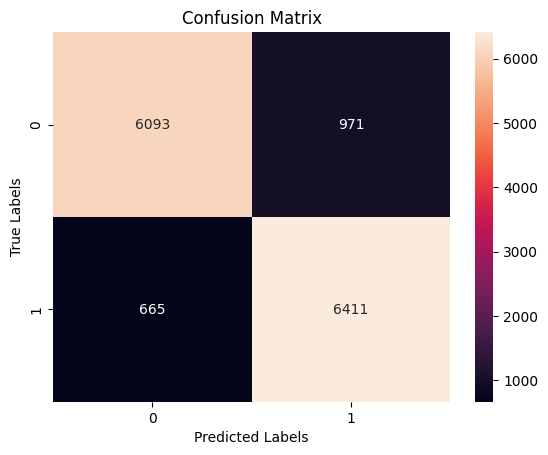

In [ ]:
class_report = classification_report(label_test, predictions4)
conf_matrix = confusion_matrix(label_test, predictions4)

accuracy = accuracy_score(label_test, predictions4)

print("-------------- Model Evaluation Results (SVM) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

-------------- Tuned Model Evaluation Results (SVM) --------------

              precision    recall  f1-score   support

          CG       0.90      0.88      0.89      7064
          OR       0.88      0.91      0.89      7076

    accuracy                           0.89     14140
   macro avg       0.89      0.89      0.89     14140
weighted avg       0.89      0.89      0.89     14140

Accuracy Score: 89.10%



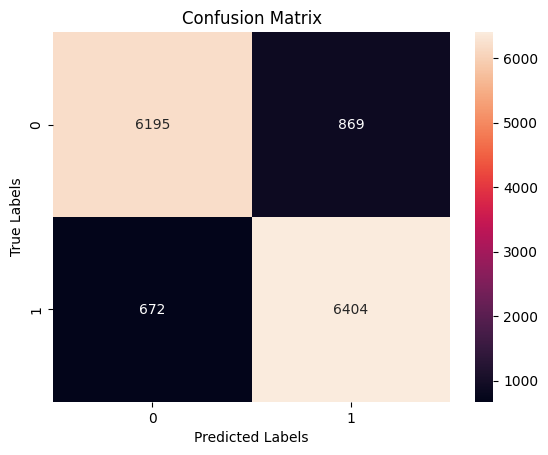

In [ ]:
class_report = classification_report(label_test, tuned_predictions4)
conf_matrix = confusion_matrix(label_test, tuned_predictions4)

accuracy = accuracy_score(label_test, tuned_predictions4)

print("-------------- Tuned Model Evaluation Results (SVM) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.2f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Save the best model to pickle:

In [ ]:
print('SVM Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions4)*100,2)) + '%')
print('Tuned SVM Prediction Accuracy:',str(np.round(accuracy_score(label_test,tuned_predictions4)*100,2)) + '%')

SVM Prediction Accuracy: 88.43%
Tuned SVM Prediction Accuracy: 89.1%


In [ ]:
with open('drive/MyDrive/FYP/model4_SVM.pkl', 'wb') as model_file:
    pickle.dump(best_model4, model_file)

## **Logistic Regression**

Create and train the pipeline:

In [ ]:
pipeline5 = Pipeline([
    ('bow',CountVectorizer(analyzer=textP)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])
pipeline5.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textP at 0x7bab3241d990>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

Make predictions:

In [ ]:
predictions5 = pipeline5.predict(review_test)
predictions_df = pd.DataFrame({'Actual Labels': label_test, 'Predicted Labels': predictions5})
predictions_df

,Actual Labels,Predicted Labels
39134,CG,CG
31011,OR,OR
24324,OR,OR
9254,OR,OR
38473,CG,CG
...,...,...
25222,CG,OR
11987,CG,CG
11986,OR,OR
3554,CG,CG


Hyperparameter Tuning:

In [ ]:
param_grid5 = {
    'classifier__C': [0.1, 1],
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': [100]
}

In [ ]:
tuned_pipeline5 = Pipeline([
    ('bow', CountVectorizer(analyzer=textP)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])

In [ ]:
grid_search5 = GridSearchCV(estimator=tuned_pipeline5, param_grid=param_grid5, cv=3, scoring='accuracy')
grid_search5.fit(review_train, label_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('bow',
                                        CountVectorizer(analyzer=<function textP at 0x7bab3241d990>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1],
                         'classifier__max_iter': [100],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy')

In [ ]:
best_params5 = grid_search5.best_params_
print("Best Hyperparameters:", best_params5)

Best Hyperparameters: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}


In [ ]:
best_model5 = grid_search5.best_estimator_
tuned_predictions5 = best_model5.predict(review_test)

Result:

-------------- Model Evaluation Results (Logistic Regression) --------------

              precision    recall  f1-score   support

          CG       0.87      0.85      0.86      7046
          OR       0.86      0.88      0.87      7094

    accuracy                           0.87     14140
   macro avg       0.87      0.87      0.87     14140
weighted avg       0.87      0.87      0.87     14140

Accuracy Score: 86.5%



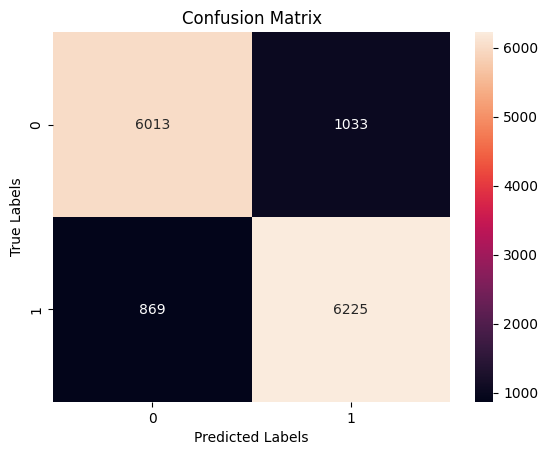

In [ ]:
class_report = classification_report(label_test, predictions5)
conf_matrix = confusion_matrix(label_test, predictions5)

accuracy = accuracy_score(label_test, predictions5)

print("-------------- Model Evaluation Results (Logistic Regression) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.1f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

-------------- Tuned Model Evaluation Results (Logistic Regression) --------------

              precision    recall  f1-score   support

          CG       0.87      0.85      0.86      7046
          OR       0.86      0.88      0.87      7094

    accuracy                           0.87     14140
   macro avg       0.87      0.87      0.87     14140
weighted avg       0.87      0.87      0.87     14140

Accuracy Score: 86.5%



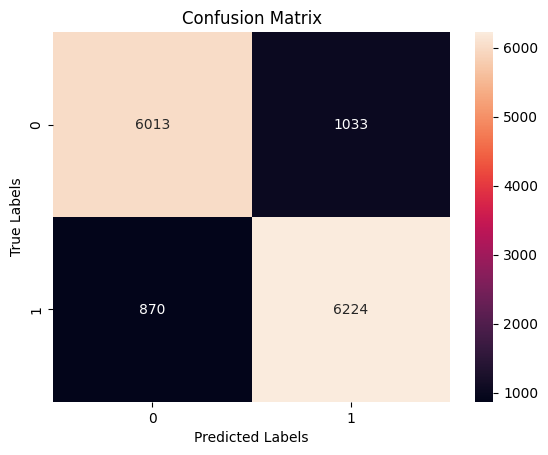

In [ ]:
class_report = classification_report(label_test, tuned_predictions5)
conf_matrix = confusion_matrix(label_test, tuned_predictions5)

accuracy = accuracy_score(label_test, tuned_predictions5)

print("-------------- Tuned Model Evaluation Results (Logistic Regression) --------------\n")
print(class_report)
print("Accuracy Score:", f"{accuracy * 100:.1f}%\n")

sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Save the best model to pickle:

In [ ]:
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions5)*100,1)) + '%')
print('Tuned Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,tuned_predictions5)*100,1)) + '%')

Logistic Regression Prediction Accuracy: 86.5%
Tuned Logistic Regression Prediction Accuracy: 86.5%


In [ ]:
with open('drive/MyDrive/FYP/model5_LogisticRegression.pkl', 'wb') as model_file:
    pickle.dump(best_model5, model_file)